In [2]:
# google drive에서 데이터 불러오기
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

dat = pd.read_csv('/content/drive/MyDrive/sample/vgames2.csv')

In [4]:
# 2중 인덱스 부분 삭제하기

dat.drop(['Unnamed: 0'],axis=1,inplace=True)

In [38]:
dat.tail(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
16588,MindJack,PS3,2011.0,Shooter,Square Enix,0.07,0.08,0.00,0.03
16589,Namco Soccer Prime Goal,PS,1995.0,Sports,Sony Computer Entertainment,0.00,0.00,0.12,0.01
16590,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010.0,Adventure,Aqua Plus,0.00,0.00,0.05,0.00
16591,Madden NFL 2005,PS2,2004.0,Sports,Electronic Arts,4.18,0.26,0.01,0.08
16592,Minna no Chizu 2,PSP,2007.0,Misc,Zenrin,0.00,0.00,0.02,0.00
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03
16597,The King of Fighters '95,PS,1996.0,Fighting,Sony Computer Entertainment,0.00,0.00,0.16,0.01


In [6]:
# Year, Genre, Publisher 등 대체하기 어려운 결측치 제거

In [7]:
dat = dat.dropna(axis=0)
dat.isna().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [8]:
dat['Genre'].value_counts()

Action          3240
Sports          2299
Misc            1681
Role-Playing    1465
Shooter         1280
Adventure       1268
Racing          1219
Platform         873
Simulation       846
Fighting         835
Strategy         669
Puzzle           566
Name: Genre, dtype: int64

In [9]:
# 출고량의 단위 일관화
import re

dat['NA_Sales'] = dat['NA_Sales'].apply(lambda x: re.sub('K','e-3',x))
dat['NA_Sales'] = dat['NA_Sales'].apply(lambda x : re.sub('M','',x))

dat['EU_Sales'] = dat['EU_Sales'].apply(lambda x: re.sub('K','e-3',x))
dat['EU_Sales'] = dat['EU_Sales'].apply(lambda x : re.sub('M','',x))

dat['JP_Sales'] = dat['JP_Sales'].apply(lambda x: re.sub('K','e-3',x))
dat['JP_Sales'] = dat['JP_Sales'].apply(lambda x : re.sub('M','',x))

dat['Other_Sales'] = dat['Other_Sales'].apply(lambda x: re.sub('K','e-3',x))
dat['Other_Sales'] = dat['Other_Sales'].apply(lambda x : re.sub('M','',x))

dat['NA_Sales'] = dat['NA_Sales'].astype(float)
dat['EU_Sales'] = dat['EU_Sales'].astype(float)
dat['JP_Sales'] = dat['JP_Sales'].astype(float)
dat['Other_Sales'] = dat['Other_Sales'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [10]:
# 지역별 출고량만 따로 추출 및 장르 추출

df = dat.iloc[:,5:]

#df['Genre'] = dat['Genre']
df = df.set_index(dat['Genre'])

In [11]:
#df[df['EU_Sales'].str.contains('K')]

In [12]:
#dat[dat['EU_Sales'].str.contains('M')]

In [13]:
df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.04,0.00,0.00,0.00
Action,0.17,0.00,0.00,0.01
Adventure,0.00,0.00,0.02,0.00
Misc,0.04,0.00,0.00,0.00
Platform,0.12,0.09,0.00,0.04
...,...,...,...,...
Platform,0.15,0.04,0.00,0.01
Action,0.01,0.00,0.00,0.00
Sports,0.44,0.19,0.03,0.13


In [14]:
df.dtypes

NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [15]:
# 게임 장르라는 테마별로 지역별 평균 출고량을 'rank'라는 변수에 데이터프레임 형태로 추출
rank = df.groupby(['Genre']).mean()
rank = pd.DataFrame(rank)

In [16]:
#rank.sort_values(by=['NA_Sales'], axis=0, ascending=False)

In [37]:
# H0 : 지역과 게임 장르는 서로 연관이 있다
from scipy.stats import chi2_contingency

chi2_contingency(rank, correction=False)
print('chisquare 값 ',chi2_contingency(rank, correction=False)[0],
      'p-value 값 ',chi2_contingency(rank, correction=False)[1])
#chisquare 값, p-value 값, df값, 기대치 배열

chisquare 값  0.4703646308851137 p-value 값  1.0


# Q. 지역과 게임 장르가 서로 연관이 있다?

**A.지역별 선호하는 게임의 장르가 유의미하게 존재한다.**

지역과 게임 장르 간 'Two Sample Chi Square Test'(두 표본의 연관성 가설 검정)를 진행한 결과, 귀무가설(지역과 게임 장르는 서로 연관이 있다)의 p_value값이 1.0이 나오면서  유의수준인 0.05를 넘었고,
**이는 지역과 게임 장르 간 서로 연관이 있다 라는 가정이 유의미하다**고 볼 수 있다. 


In [18]:
# Q . 연도별 게임 트렌드가 있을까?(=연도와 게임 장르가 연관이 있다.)

In [19]:
# 'Year' 항목을 따로 추출하여 데이터 프레임화
df2 = dat.iloc[:,2:4]

In [20]:
df2['Year'] = df2['Year'].astype(int)

In [21]:
def year_comp(x):
  if  x < 20:
   return 2000+x
  elif 20<x & x<99:
    return 1900+x
  else :
    return x

df2['Year'] = df2['Year'].apply(year_comp)

In [22]:
# 연도별 오름차순 정리
df2.sort_values(by='Year').head(10)

,Year,Genre
14264,1980,Fighting
5723,1980,Shooter
15012,1980,Shooter
9226,1980,Misc
13133,1980,Action
10121,1980,Misc
7317,1980,Misc
5938,1980,Misc
1060,1981,Action
1308,1981,Action


In [23]:
obs1 = pd.crosstab(df2['Year'],df2['Genre'])

In [24]:
from scipy.stats import chi2_contingency

chi2_contingency(obs1, correction=False)
print('chisquare 값 ',chi2_contingency(obs1, correction=False)[0],
      'p-value 값 ',chi2_contingency(obs1, correction=False)[1])

chisquare 값  2763.3426220442343 p-value 값  0.0


# Q. 연도와 게임 장르 간 연관이 있다?
**A.연도에 따른 게임 트렌드는 유의미하게 존재하지않는다**

연도와 게임 장르 간 'Two Sample Chi Square Test'(두 표본의 연관성 가설 검정)를 진행한 결과,
귀무가설(연도와 게임 장르는 서로 연관이 있다)의 p_value값이 0.0이 나오면서 유의수준인 0.05에 못미치는 수준이 나왔고, 이는 **연도와 게임 장르 간 서로 연관이 있다 라는 가정이 유의미하지 않다고** 볼 수 있다.

결론적으로 지역과 게임 장르 간 연관성은 유의미하다고 판단되었으므로 지역 별 군집화를 시행하였을때 가장 큰 영향을 끼치는 지역의 수(k값)를 파악하고, 해당 지역의 출고량에 따른 선호 장르를 파악한 후 해당 장르에 해당하는 게임들 중 선호도가 높은 게임 플랫폼을 추정한다. 마지막으로 분석해 낸 게임 장르와 플랫폼으로 특정된 게임 회사들을 북미 지역을 대상으로 비교하여 게임 회사를 선정한다.

In [25]:
# 영향력 있는 지역 군집의 갯수 k 값 찾기 : k = 1

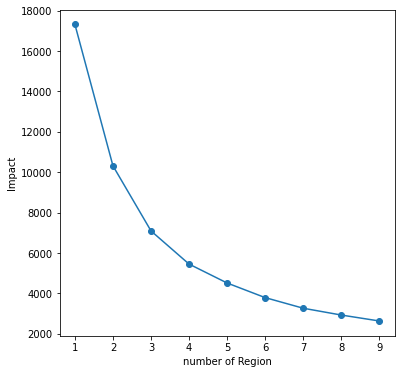

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# 적절한 군집수 찾기
# Inertia(군집 내 거리제곱합의 합) value (적정 군집수)

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(6, 6))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of Region')
plt.ylabel('Impact')
plt.xticks(ks)
plt.show()


In [27]:
df.sum() #출고량의 총 합산 결과 : 북미 지역이 가장 큰 시장 = k의 대상 지역

NA_Sales       4307.04
EU_Sales       2393.57
JP_Sales       1271.39
Other_Sales     783.37
dtype: float64

In [28]:
rank = rank.sort_values(by=['NA_Sales'], axis=0, ascending=False)

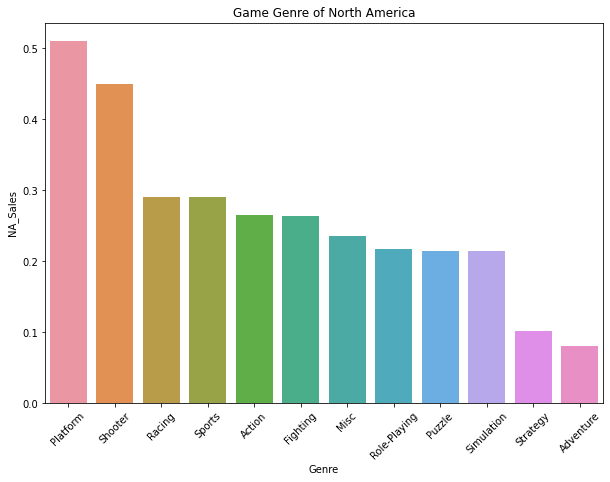

In [39]:
# 북미 지역에서의 가장 출고량이 높은 게임의 장르
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
plt.xticks(rotation =  45 )
plt.title('Game Genre of North America')
sns.barplot(data=rank,
            x= rank.index,
            y='NA_Sales'
            )


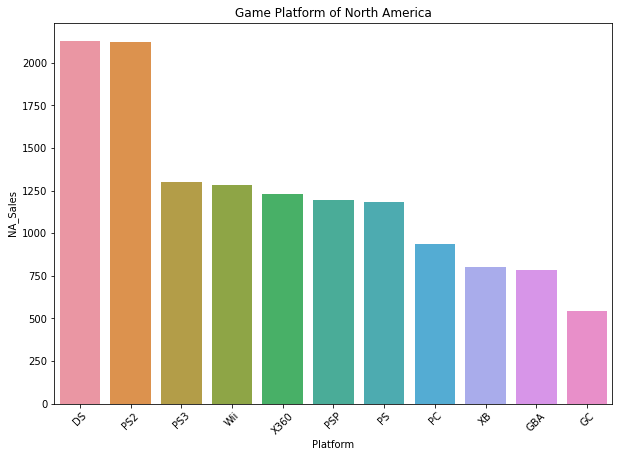

In [40]:
# 북미 지역에서의 가장 출고량이 높은 게임 플랫폼
pl = dat.loc[:,['Platform','NA_Sales']]
pl = pd.DataFrame(pl)
pl = pl.groupby(['Platform']).count()
pl = pl.sort_values(by=['NA_Sales'], axis=0, ascending=False)
pl_top = pl.iloc[0:11]


plt.figure(figsize=(10, 7))
plt.xticks(rotation =  45 )
plt.title('Game Platform of North America')
sns.barplot(data=pl_top,
            x= pl_top.index,
            y= 'NA_Sales'
            )

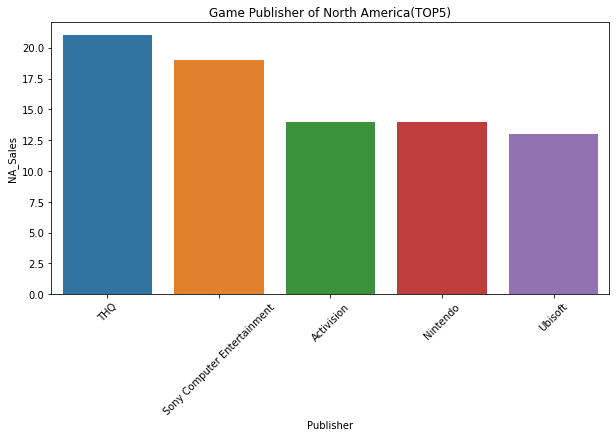

In [31]:
cond = (dat['Genre'] == 'Platform') & ((dat['Platform']=='DS')|(dat['Platform']=='PS2'))
fin_pb = pd.DataFrame(dat[cond][['NA_Sales','Publisher']])
fin_pb = fin_pb.groupby(['Publisher']).count()
fin_pb = fin_pb.sort_values(by=['NA_Sales'], axis=0, ascending=False).iloc[0:11]
fin_pb #북미 지역을 대상으로 도출한 Platform 장르의 DS 또는 PS2 플랫폼을 이용하는 게임 회사들의 출고 순위

fin = fin_pb.iloc[0:5]
plt.figure(figsize=(10, 5))
plt.xticks(rotation =  45 )
plt.title('Game Publisher of North America(TOP5)')
sns.barplot(data=fin,
            x= fin.index,
            y= 'NA_Sales'
            )

# ⬆ 북미 지역을 대상으로 도출한 Platform 장르의 DS 또는 PS2 플랫폼을 이용하는 게임 회사들의 출고 순위 TOP5

In [32]:
#pb = dat.loc[:,['Publisher','NA_Sales']]
#pb = pd.DataFrame(pb)
#pb = pb.groupby(['Publisher']).count()

In [33]:
#pb = pb.sort_values(by=['NA_Sales'], axis=0, ascending=False)

In [34]:
#pb_top = pb.iloc[0:11]

In [35]:
#pb_top

In [36]:
# 북미 지역에서의 가장 출고량이 높은 게임 회사
#from matplotlib import pyplot as plt
#import seaborn as sns

#plt.figure(figsize=(20, 7))
#plt.xticks(rotation =  45 )
#plt.title('Game Publisher of North America')
#sns.barplot(data=pb_top,
#            x= pb_top.index,
#            y= 'NA_Sales'
#            )
